## Hoja de trabajo 02

Integrantes:
- Andrea Ximena Ramírez Recinos, 21874
- Adrián Ricardo Flores Trujillo, 21500
- Emily Elvia Melissa Pérez Alarcón, 21385


In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt

# Clustering
import sklearn.cluster as cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import pyclustertend

# Data preprocessing
import sklearn.preprocessing

# Metrics for clustering evaluation
from sklearn.metrics import silhouette_score

In [2]:
# Read the data from the CSV file into a DataFrame and handle encoding issues if any.
df = pd.read_csv('Data/movies.csv', encoding='unicode_escape')

# Convert string values in numeric columns to numeric data types, replacing non-convertible values with NaN.
df[['castMenAmount', 'castWomenAmount']] = df[['castMenAmount', 'castWomenAmount']].apply(pd.to_numeric, errors='coerce')

# Replace excessively high values with NaN, as they are likely erroneous.
df[['castMenAmount', 'castWomenAmount']] = np.where(df[['castMenAmount', 'castWomenAmount']] > 1000, np.nan, df[['castMenAmount', 'castWomenAmount']])

# Display the DataFrame containing movie data.
df

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15.0,9.0
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3.0,9.0
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5.0,62.0
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5.0,18.0
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,...,16.662,2021-11-26,6.8,108,2,1,1,10,2.0,4.0
9996,920143,0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,...,491.706,2021-12-25,1.5,2,1,2,1,8,1.0,1.0
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,...,565.658,2021-12-17,6.1,30,1,1,17,1,0.0,NaN
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,...,9.664,2021-12-17,6.0,1,1,0,0,0,NaN,NaN


1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [3]:
# Select only numerical columns from the DataFrame as qualitative variables are not suitable for clustering.
# Drop the 'id' column as it does not provide significant information for clustering, leaving only numeric data.
df = df.select_dtypes(include=[np.number])
df = df.loc[:, df.columns != 'id'].dropna()
df

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,4257354.0,98,20.880,5.7,2077,2,2,1,25,15.0,9.0
1,21000000,12136938.0,110,9.596,6.5,223,3,3,2,15,3.0,9.0
2,11000000,775398007.0,121,100.003,8.2,16598,3,2,1,105,5.0,62.0
3,94000000,940335536.0,100,134.435,7.8,15928,2,1,1,24,5.0,18.0
4,55000000,677387716.0,142,58.751,8.5,22045,3,2,1,76,18.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,0.0,0,28.548,2.0,1,1,1,1,2,1.0,0.0
9992,0,0.0,77,153.156,7.5,22,2,3,2,9,4.0,2.0
9995,0,0.0,100,16.662,6.8,108,2,1,1,10,2.0,4.0
9996,0,0.0,97,491.706,1.5,2,1,2,1,8,1.0,1.0


In [4]:
# Since the dataset might be too large for computational resources, a sample of 1000 rows is taken for processing.
dfArray = np.array(df.sample(1000))

# Data normalization
# Scale the data to have zero mean and unit variance along each feature.
# This step is crucial for clustering algorithms as it ensures that each feature contributes equally to the distance calculations.
df_scale = sklearn.preprocessing.scale(dfArray)
df_scale

array([[-0.55314415, -0.41693423, -3.69129878, ..., -0.42934519,
        -0.656479  , -0.35263656],
       [-0.55314415, -0.41693423, -0.29643347, ..., -0.89970582,
        -0.656479  , -0.98411671],
       [-0.55314415, -0.41693423, -0.48932354, ..., -0.14712881,
        -0.01850135,  0.18863214],
       ...,
       [-0.15139841,  0.05206967,  4.83444252, ...,  1.21691703,
        -1.13496224,  2.80476419],
       [-0.01748316,  0.01741075,  0.3979708 , ..., -0.05305668,
        -0.33749018,  0.72990084],
       [-0.55314415, -0.41693423, -0.02638736, ...,  0.08805151,
        -0.17799576,  0.82011229]])

2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Discuta sus resultados e impresiones.

In [5]:
# Calculate the Hopkins statistic to assess the clustering tendency of the data.
hopkinsValue = pyclustertend.hopkins(df_scale, len(df_scale))

# Determine if clustering is worthwhile based on the Hopkins statistic.
if hopkinsValue < 0.5:
    print(f"The Hopkins Value is {hopkinsValue:.3f}, indicating a strong tendency for clustering.")
    print("Clustering is worthwhile.")
else:
    print(f"The Hopkins Value is {hopkinsValue:.3f}, indicating little clustering tendency.")
    print("Clustering may not be meaningful for this dataset.")

The Hopkins Value is 0.096, indicating a strong tendency for clustering.
Clustering is worthwhile.


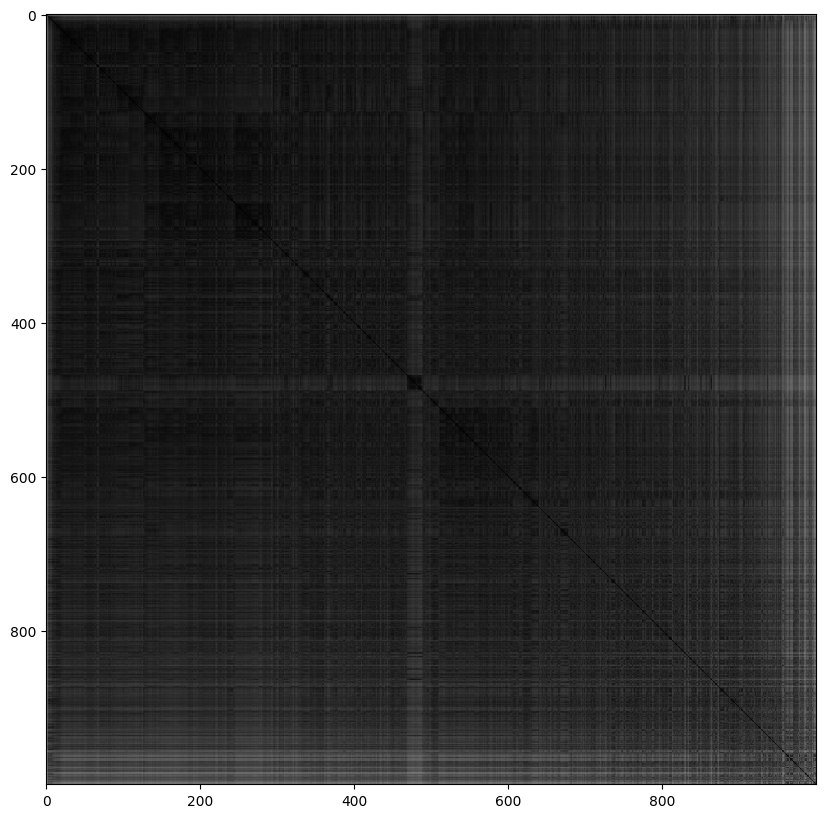

In [6]:
# Visual Assessment of Tendency (VAT) analysis.
# This visualization helps to identify potential clustering structures in the data.
# In the generated VAT plot, 2 distinct clusters or groups may be observed.
pyclustertend.vat(df_scale)

Tanto el análisis de Validación de la Tendencia Automática (VAT) como el estadístico de Hopkins validan la formación de clústeres en este conjunto de datos. El valor del estadístico de Hopkins, que se sitúa significativamente lejos de 0.5 (aproximadamente en el rango de 0.07-0.09), justifica la realización de un análisis de clustering. Por su parte, en el análisis visual proporcionado por el VAT, se logran distinguir entre dos y tres grupos distintos.

3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

In [7]:
# List to store the sum of square distances between the centroids and each point.
wcss = []
n_clusters = range(1, 11)
for i in n_clusters: 
    # Initialize KMeans clustering with 'k-means++' initialization method and a fixed random state for reproducibility.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # Fit the KMeans model to the data.
    kmeans.fit(df)
    # Append the inertia to the list.
    wcss.append(kmeans.inertia_)

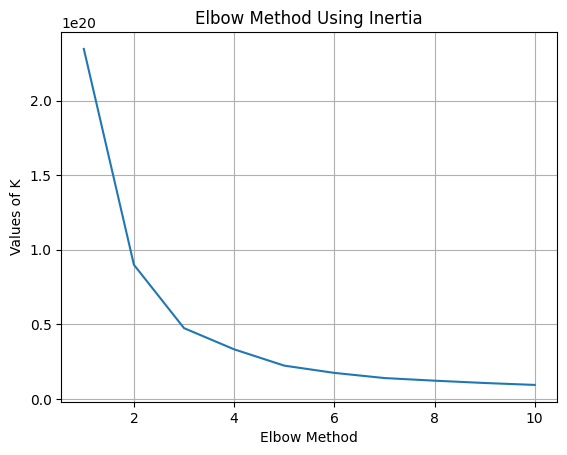

In [8]:
plt.plot(n_clusters, wcss)
plt.xlabel("Elbow Method")
plt.ylabel("Values of K")
plt.title("Elbow Method Using Inertia")
plt.grid()
plt.show()

En la gráfica presentada anteriormente, que fue generada a partir de la implementación del método del codo utilizando inercia, se puede inferir que la cantidad óptima de clústeres a formar en este conjunto de datos es 2. Este resultado valida lo que previamente se había deducido utilizando el método de Visualización de la Tendencia Automática (VAT).

4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.

In [9]:
# Applying K-Means algorithm

#  n_clusters: Number of clusters to form.
#  fit: Compute k-means clustering.
#  df_scale: Input data, which is preprocessed and scaled.
kMean = cluster.KMeans(n_clusters=2).fit(df_scale)

# Printing the K-Means model
print(kMean)

KMeans(n_clusters=2)


In [10]:
# Getting cluster centroids
centroids = kMean.cluster_centers_

# Printing the centroids
print(centroids)

[[-0.32137511 -0.29780619 -0.19813278 -0.06051338 -0.08164856 -0.28678266
  -0.05238547 -0.07967084 -0.04216422 -0.35581413 -0.26642431 -0.34475733]
 [ 1.20898255  1.12031851  0.74535664  0.22764558  0.30715409  1.07884904
   0.19706917  0.29971413  0.15861779  1.33853885  1.00226289  1.29694424]]


In [11]:
movies = kMean.predict(df_scale)

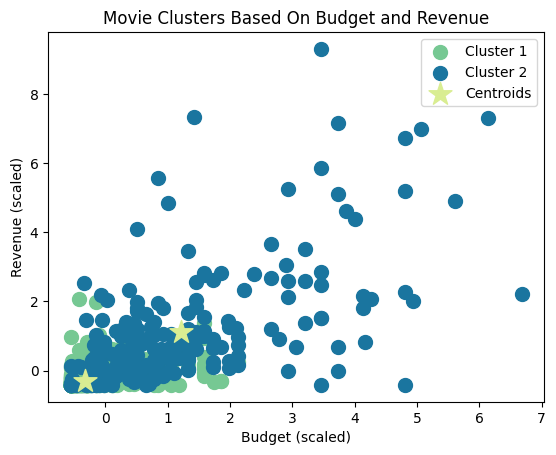

In [12]:
# Scatter plot for points in Cluster 1
plt.scatter(df_scale[movies == 0, 0], df_scale[movies == 0, 1], s=100, c='#76c893', label="Cluster 1")

# Scatter plot for points in Cluster 2
plt.scatter(df_scale[movies == 1, 0], df_scale[movies == 1, 1], s=100, c='#1a759f', label="Cluster 2")

# Scatter plot for centroids
plt.scatter(kMean.cluster_centers_[:, 0], kMean.cluster_centers_[:, 1], s=300, c="#d9ed92", marker="*", label="Centroids")

# Plot title and labels
plt.title("Movie Clusters Based On Budget and Revenue")
plt.xlabel("Budget (scaled)")
plt.ylabel("Revenue (scaled)")
plt.legend()

# Display the plot
plt.show()

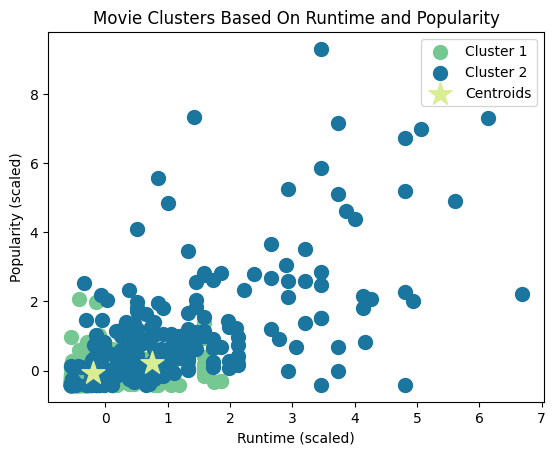

In [13]:
# Scatter plot for points in Cluster 1
plt.scatter(df_scale[movies == 0, 0], df_scale[movies == 0, 1], s=100, c='#76c893', label="Cluster 1")

# Scatter plot for points in Cluster 2
plt.scatter(df_scale[movies == 1, 0], df_scale[movies == 1, 1], s=100, c='#1a759f', label="Cluster 2")

# Scatter plot for centroids
plt.scatter(kMean.cluster_centers_[:, 2], kMean.cluster_centers_[:, 3], s=300, c="#d9ed92", marker="*", label="Centroids")

# Plot title and labels
plt.title("Movie Clusters Based On Runtime and Popularity")
plt.xlabel("Runtime (scaled)")
plt.ylabel("Popularity (scaled)")
plt.legend()

# Display the plot
plt.show()

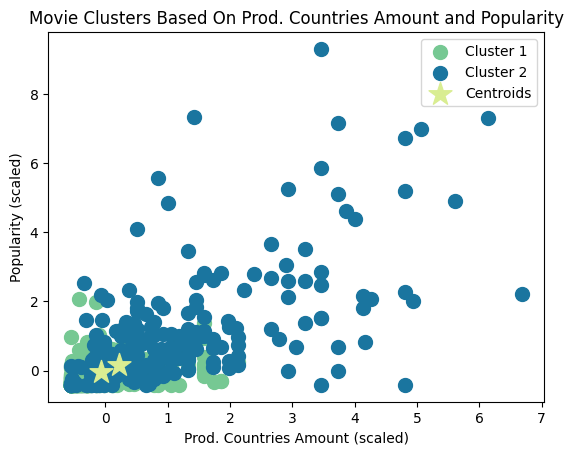

In [14]:
# Scatter plot for points in Cluster 1
plt.scatter(df_scale[movies == 0, 0], df_scale[movies == 0, 1], s=100, c='#76c893', label="Cluster 1")

# Scatter plot for points in Cluster 2
plt.scatter(df_scale[movies == 1, 0], df_scale[movies == 1, 1], s=100, c='#1a759f', label="Cluster 2")

# Scatter plot for centroids
plt.scatter(kMean.cluster_centers_[:, 3], kMean.cluster_centers_[:, 8], s=300, c="#d9ed92", marker="*", label="Centroids")

# Plot title and labels
plt.title("Movie Clusters Based On Prod. Countries Amount and Popularity")
plt.xlabel("Prod. Countries Amount (scaled)")
plt.ylabel("Popularity (scaled)")
plt.legend()

# Display the plot
plt.show()

5. Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

6. Interprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las medidas de tendencia central de las variables continuas y las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.

Enlace a la discusión de resultados: https://docs.google.com/document/d/14eCCvQ_C5yHVzzyvL_xo4VWLY_o9-9R3Mdc7et8q8JA/edit?usp=sharing